# Problem 1

### part a

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


def f(x):
    # Define the function you want to optimize
    return x[0]**2 + x[1]**2

def gradient_f(x):
    # Compute the gradient of the function at point x
    return np.array([2 * x[0], 2 * x[1]])

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x

    for i in range(num_iterations):
        gradient = gradient_f(x)
        x = x - learning_rate * gradient

    return x

# Set the initial point and learning rate
initial_point = np.array([1.0, 1.0])
learning_rate = 0.1
num_iterations = 100

# Run gradient descent
optimized_point = gradient_descent(initial_point, learning_rate, num_iterations)

print("Optimized point:", optimized_point)
print("Optimized function value:", f(optimized_point))


Optimized point: [2.03703598e-10 2.03703598e-10]
Optimized function value: 8.299031137761999e-20


### part b

In [ ]:
import pdb

def f(x):
    # Define the function you want to optimize
    return x[0]**2 + x[1]**2

def gradient_momentum_f(x, learning_momentum, v):
    # Compute the gradient with the learning momentum
    a = x[0] - learning_momentum * v[0]
    b = x[1] - learning_momentum * v[1]
    return np.array([2 * a, 2 * b])

def gradient_descent_momentum(initial_x, learning_rate, learning_momentum, num_iterations):
    # anh's notes:
    # 'evaluate at the looking ahead point, not summing gradient at two different points'
    # computation of error term is wrong?
    # what is the error term
    # gradient for f_2 is not (mathematically) correct
    x = initial_x
    v = initial_x

    for i in range(num_iterations):
        gradient = gradient_momentum_f(x, learning_momentum, v)
        v_next = (learning_momentum * v) + (learning_rate * gradient)
        x_next = x - v
        v = v_next
        x = x_next
    return x

# Set the initial point and learning rate
initial_point = np.array([1.0, 1.0])
learning_rate = 0.1
learning_momentum = 0.5
num_iterations = 100

# Run gradient descent
optimized_point = gradient_descent_momentum(initial_point, learning_rate, learning_momentum, num_iterations)

print("Optimized point:", optimized_point)
print("Optimized function value:", f(optimized_point))


Optimized point: [3.33503993e-12 3.33503993e-12]
Optimized function value: 2.2244982618076215e-23


### part c

Optimized point (standard): [4.14951557e-20 4.14951557e-20]
Optimized function value (standard): 3.443695891277159e-39
Optimized point (momentum): [9.8149731e-05 9.8149731e-05]
Optimized function value (momentum): 1.926673937441403e-08
Optimized point (varying): [-0.16641613 -0.16641613]
Optimized function value (varying): 0.05538865423498699


<Figure size 640x480 with 0 Axes>

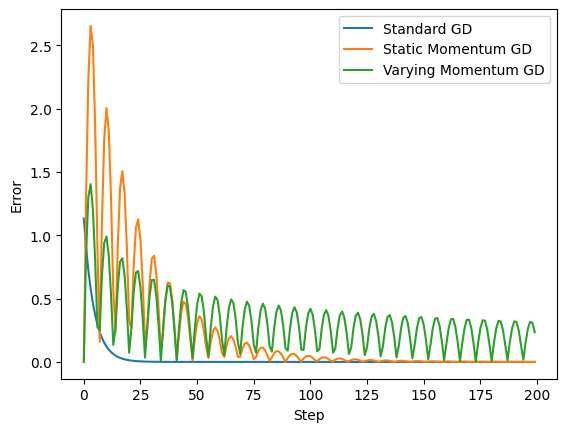

In [16]:
### FUNCTION 1
import pdb

def f1(fx):
    # Define the first function you want to optimize
    x = fx[0]
    y = fx[1]
    return x**2 + y**2

def gradient_f1(fx):
    # Compute the gradient of the function at point x
    x = fx[0]
    y = fx[1]
    return np.array([2 * x, 2 * y])

def gradient_momentum_f1(fx, learning_momentum, v):
    # Compute the gradient with the learning momentum
    a = fx[0] - learning_momentum * v[0]
    b = fx[1] - learning_momentum * v[1]
    return np.array([2 * a, 2 * b])

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x
    # desc_steps = ([[initial_x]])

    # i am like maybe almost there to figuring out what i'm trying to do here
    # -max
    # if you can figure out what i have going on better than me
    # be my guest

    # try y_pred - y_actual to get the error
    y_actual = np.array([0,0]) # for f1

    errors = []
    steps = []

    for i in range(num_iterations):
        gradient = gradient_f1(x)
        x = x - learning_rate * gradient
        # np.append(desc_steps,x)

        # this is what was on the whiteboard earlier
        y_pred = np.array([x[0], x[1]])
        errors.append(np.linalg.norm(y_actual - y_pred))
        steps.append(i)
        # where are error and steps being concatenated to create ordered pairs for graph?
        # steps is i (x axis) and error is y-axis
        # we should do that here

    # plt.plot(steps, errors)
    # plt.show()

    return [x, errors, steps]


def gradient_descent_momentum(initial_x, learning_rate, learning_momentum, num_iterations):
    x = initial_x
    v = initial_x

    y_actual = np.array([0,0]) # for f1

    errors = []
    steps = []

    for i in range(num_iterations):
        gradient = gradient_momentum_f1(x, learning_momentum, v)
        v_next = (learning_momentum * v) + (learning_rate * gradient)
        x_next = x - v
        v = v_next
        x = x_next

        y_pred = np.array([x[0], x[1]])
        errors.append(np.linalg.norm(y_actual - y_pred))
        steps.append(i)
        # print("iteration " + str(i))
        # pdb.set_trace()

    # plt.plot(steps, errors)
    # plt.show()

    return [x, errors, steps]


def gradient_descent_varying(initial_x, learning_rate, num_iterations):
    x = initial_x
    v = initial_x

    y_actual = np.array([0,0]) # for f1

    errors = []
    steps = []

    for i in range(num_iterations):
        learning_momentum = (i+1)/(i+2)
        gradient = gradient_momentum_f1(x, learning_momentum, v)
        v_next = (learning_momentum * v) + (learning_rate * gradient)
        x_next = x - v
        v = v_next
        x = x_next

        y_pred = np.array([x[0], x[1]])
        errors.append(np.linalg.norm(y_actual - y_pred))
        steps.append(i)
        # print("iteration " + str(i))
        # pdb.set_trace()

    # plt.plot(steps, errors)
    # plt.show()

    return [x, errors, steps]

# Set the initial point and learning rate
initial_point = np.array([1.0, 1.0]) # np.random.randn(2,1) - will generate random array shaped 2,1
learning_rate = 0.1
learning_momentum = .9
num_iterations = 200

# Set up plots
fig = plt.figure()
figure, axes = plt.subplots()

# Run gradient descent
point, errors, steps = gradient_descent(initial_point, learning_rate, num_iterations)
standard_optimized_point = point
print("Optimized point (standard):", standard_optimized_point)
print("Optimized function value (standard):", f1(standard_optimized_point))
axes.plot(steps, errors, label="Standard GD")

point, errors, steps = gradient_descent_momentum(initial_point, learning_rate, learning_momentum, num_iterations)
momentum_optimized_point = point
print("Optimized point (momentum):", momentum_optimized_point)
print("Optimized function value (momentum):", f1(momentum_optimized_point))
axes.plot(steps, errors, label="Static Momentum GD")

point, errors, steps = gradient_descent_varying(initial_point, learning_rate, num_iterations)
varying_optimized_point = point
print("Optimized point (varying):", varying_optimized_point)
print("Optimized function value (varying):", f1(varying_optimized_point))
axes.plot(steps, errors, label="Varying Momentum GD")

# plotting
axes.set_xlabel("Step")
axes.set_ylabel("Error")
axes.legend()
# plt.plot(standard_op)
plt.show()


WHAT WE NEED:
- all on one graph
- color coded
- labeled
- axes labeled

Optimized point (standard): [1.01915039 1.03874327]
Optimized function value (standard): 0.00036731119986267426
Optimized point (momentum): [1. 1.]
Optimized function value (momentum): 2.2803010541544873e-27
Optimized point (varying): [0.75735871 0.59485754]
Optimized function value (varying): 0.10409618122770778


<Figure size 640x480 with 0 Axes>

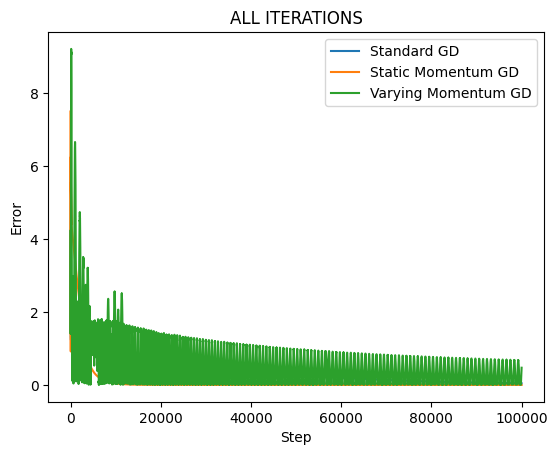

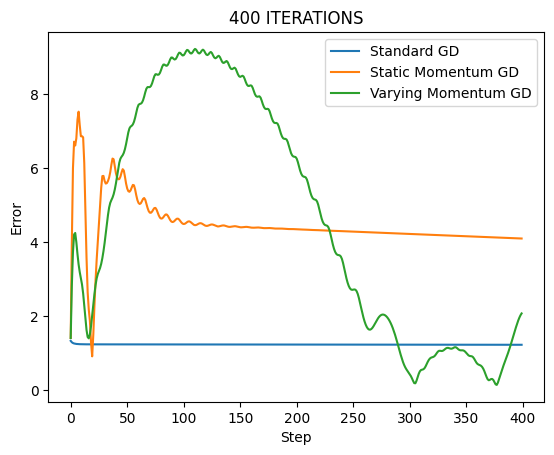

In [30]:
### FUNCTION 2
import pdb

def f2(fx):
    # Define the second function to optimize
    x = fx[0]
    y = fx[1]
    f = (1-x)**2 + (100 * (y - x**2)**2)
    return f

def gradient_f2(fx):
    # Compute the gradient of the function at point x
    x = fx[0]
    y = fx[1]
    dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfdy = (200 * y) - (200 * x**2)
    return np.array([dfdx, dfdy])

def gradient_momentum_f2(fx, learning_momentum, v):
    # Compute the gradient of with learning momentum
    x = fx[0] - learning_momentum * v[0]
    y = fx[1] - learning_momentum * v[1]
    dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfdy = (200 * y) - (200 * x**2)
    return np.array([dfdx, dfdy])

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x

    y_actual = np.array([1,1]) # for f1

    errors = []
    steps = []

    for i in range(num_iterations):
        # print("normal, iteration:", i)
        gradient = gradient_f2(x)
        x = x - learning_rate * gradient

        y_pred = np.array([x[0], x[1]])
        errors.append(np.linalg.norm(y_actual - y_pred))
        steps.append(i)

    return [x, errors, steps]

def gradient_descent_momentum(initial_x, learning_rate, learning_momentum, num_iterations):
    x = initial_x
    v = initial_x

    y_actual = np.array([1,1]) # for f1

    errors = []
    steps = []

    for i in range(num_iterations):
        # print("momentum, iteration:", i)
        gradient = gradient_momentum_f2(x, learning_momentum, v)
        v_next = np.add((learning_momentum * v), (learning_rate * gradient))
        x_next = np.add(x, -1 * v)
        # pdb.set_trace()
        v = v_next
        x = x_next
        # print("iteration " + str(i))
        # pdb.set_trace()
        y_pred = np.array([x[0], x[1]])
        errors.append(np.linalg.norm(y_actual - y_pred))
        steps.append(i)

    return [x, errors, steps]

def gradient_descent_varying(initial_x, learning_rate, num_iterations):
    x = initial_x
    v = initial_x

    y_actual = np.array([1,1]) # for f1

    errors = []
    steps = []

    for i in range(num_iterations):
        # print("varying, iteration:", i)
        learning_momentum = (i+1)/(i+2)
        gradient = gradient_momentum_f2(x, learning_momentum, v)
        v_next = (learning_momentum * v) + (learning_rate * gradient)
        x_next = x - v
        v = v_next
        x = x_next
        # print("iteration " + str(i))
        # pdb.set_trace()

        y_pred = np.array([x[0], x[1]])
        errors.append(np.linalg.norm(y_actual - y_pred))
        steps.append(i)

    return [x, errors, steps]

# Set the initial point and learning rate
initial_point = np.array([2.0, 2.0])
learning_rate = 0.0001
learning_momentum = 0.9
num_iterations = 100000

# Set up plots
fig1 = plt.figure()
figure1, axes1 = plt.subplots()
figure2, axes2 = plt.subplots()

# Run gradient descent
point, errors, steps = gradient_descent(initial_point, learning_rate, num_iterations)
standard_optimized_point = point
print("Optimized point (standard):", standard_optimized_point)
print("Optimized function value (standard):", f2(standard_optimized_point))
axes1.plot(steps, errors, label="Standard GD")
axes2.plot(steps[0:400], errors[0:400], label="Standard GD")

point, errors, steps = gradient_descent_momentum(initial_point, learning_rate, learning_momentum, num_iterations)
momentum_optimized_point = point
print("Optimized point (momentum):", momentum_optimized_point)
print("Optimized function value (momentum):", f2(momentum_optimized_point))
axes1.plot(steps, errors, label="Static Momentum GD")
axes2.plot(steps[0:400], errors[0:400], label="Static Momentum GD")

point, errors, steps = gradient_descent_varying(initial_point, learning_rate, num_iterations)
varying_optimized_point = point
print("Optimized point (varying):", varying_optimized_point)
print("Optimized function value (varying):", f2(varying_optimized_point))
axes1.plot(steps, errors, label="Varying Momentum GD")
axes2.plot(steps[0:400], errors[0:400], label="Varying Momentum GD")

# plotting
axes1.set_xlabel("Step")
axes1.set_ylabel("Error")
axes1.legend()
axes1.set_title("ALL ITERATIONS")
axes2.set_xlabel("Step")
axes2.set_ylabel("Error")
axes2.legend()
axes2.set_title("400 ITERATIONS")
figure1.show()

## PLOT SECOND GRAPH ZOOOOMED IN
# fig2.xlim(0,100)
figure2.show()

# Problem 2

In [ ]:
### IMPORTS
from sklearn.datasets import fetch_openml

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
### FETCH DATA, ASSIGN VARS

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X,y = mnist["data"], mnist["target"]
X = np.array(X)
some_digit = X[0]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Our 3 classifiers:
1. OvA
2. Random Forest
3. KNeighbors (probably will work best)

## One vs. All (OvA)

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

some_digit_scores = sgd_clf.decision_function([some_digit])

y_train_ova_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
f1_score(y_train, y_train_ova_pred, average="macro")

KeyboardInterrupt: ignored

The One vs. All classifier was the slowest and least accurate of the 3 classifiers we chose. It took 16 minutes to produce an f1 score of 87%.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

forest_clf.predict_proba([some_digit])

y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=5)
f1_score(y_train, y_train_forest_pred, average="macro")

The Random Forest classifier and the K Neighbors classifier scored very similarly, but because it's more difficult to tune the hyperparameters for this classifier, it is not the best one of the 3 we chose.

## K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])


y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=5)
f1_score(y_multilabel, y_train_knn_pred, average="macro")



### TEST

y_test_large = (y_test >= 7)
y_test_odd = (y_test % 2 == 1)
y_multilabel_test = np.c_[y_test_large, y_test_odd]

y_test_knn_pred = cross_val_predict(knn_clf, X_test, y_multilabel_test, cv=5)
f1_score(y_multilabel_test, y_test_knn_pred, average="macro")

The K Nearest Neighbors classifier is the best of the 3 classifiers we chose. While it performed very similarly to the Random Forest classifier in this example, further tuning of hyperparameters would improve its performance even more.